# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muchlas Andrey Pahlevi
- **Email:** muklasandrey@gmail.com
- **ID Dicoding:** MC269D5Y0683

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda selama tahun 2011 dan 2012?
- Apakah terdapat pola musiman atau tren waktu dalam penggunaan sepeda selama tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

#### Membaca Dataset

In [2]:
df_day = pd.read_csv("data/day.csv")

#### Menampilkan 5 baris pertama dari dataset

In [3]:
print("Preview df_day:")
print(df_day.head())

Preview df_day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


#### Menampilkan Informasi Dataset

In [5]:
print("Informasi df_day:")
print(df_day.info())

Informasi df_day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


**Insight:**
- Dataset berisi data penyewaan sepeda harian dari tahun 2011 hingga 2012 dengan total 731 baris (hari).
- Pengguna dibagi menjadi dua kategori yaitu :
   - Casual (tidak terdaftar)
   - Registered (terdaftar)
- Faktor cuaca dan musim dapat memengaruhi jumlah penyewaan sepeda

### Assessing Data

#### Melihat Informasi Umum Dataset

In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Mengecek Missing Values

In [7]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mengecek rentang tahun menggunakan unique, min dan max
Maka ditemukan tahun dari dataset tersebut yaitu 2011 dan 2012

In [8]:
(df_day['yr'].unique(), (df_day['dteday'].min(), df_day['dteday'].max()))

(array([0, 1]), ('2011-01-01', '2012-12-31'))

#### Mengecek Data Duplikat

In [9]:
df_day.duplicated().sum()

np.int64(0)

#### Mengecek Distribusi Data

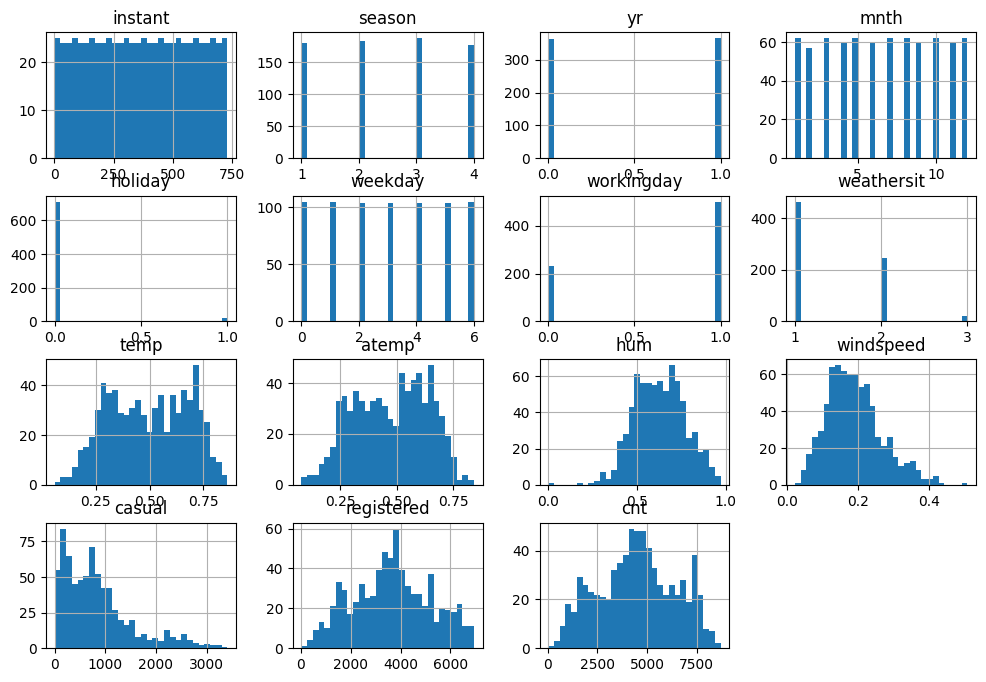

In [11]:
df_day.hist(figsize=(12, 8), bins=30)
plt.show()

**Insight:**
- Tidak ada missing values, artinya data sudah lengkap dan tidak memerlukan imputasi.
- Variabel kategori dikodekan sebagai angka (misalnya season, weathersit), sehingga perlu dikonversi ke label yang lebih mudah dipahami.
- Beberapa kolom memiliki skala berbeda, misalnya temp disajikan dalam skala normalisasi (0-1), sedangkan cnt dalam jumlah asli penyewaan.
- Perlu eksplorasi lebih lanjut untuk outlier, terutama di jumlah penyewaan (cnt), suhu (temp), dan faktor cuaca.
- Kolom instant tidak terlalu diperlukan

### Cleaning Data

#### Mengubah kode kategori menjadi label asli

In [12]:
df_day['season'] = df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_day['weathersit'] = df_day['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})
df_day['yr'] = df_day['yr'].map({0: '2011', 1: '2012'})

#### Konversi dteday ke tipe datetime

In [13]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

#### Menghapus Kolom yang tidak diperlukan (instant)

In [14]:
df_day.drop(columns=['instant'], inplace=True)

#### Konversi skala suhu dan kelembaban ke skala yang lebih nyata :
  - suhu menjadi celcius
  - kelembaban dalam persen

In [15]:
df_day['temp'] = df_day['temp'] * 41
df_day['hum'] = df_day['hum'] * 100

#### Hasil Perubahan

In [16]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,1,0,6,0,Cloudy,14.110847,0.363625,80.5833,0.160446,331,654,985
1,2011-01-02,Spring,2011,1,0,0,0,Cloudy,14.902598,0.353739,69.6087,0.248539,131,670,801
2,2011-01-03,Spring,2011,1,0,1,1,Clear,8.050924,0.189405,43.7273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,1,0,2,1,Clear,8.200000,0.212122,59.0435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,1,0,3,1,Clear,9.305237,0.229270,43.6957,0.186900,82,1518,1600


**Insight:**
- Mengubah kode kategori menjadi label asli
- Menghapus kolom instant
- Mengkonversi dteday dari object menjadi datetime
- Skala pada beberapa variabel cuaca (temp, atemp, hum, windspeed) bukan dalam satuan asli sehingga bisa dipertimbangkan untuk dikonversi ke skala yang lebih interpretatif (misalnya suhu dalam derajat Celcius).

## Exploratory Data Analysis (EDA)

### Explore `df_day`

#### Statistik Deskriptif

In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
df_day.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
177,2011-06-27,Fall,2011,6,0,1,1,Cloudy,27.982500,0.637004,65.8333,0.107588,854,3854,4708,2011,6
609,2012-09-01,Fall,2012,9,0,6,0,Cloudy,30.886653,0.702654,63.8333,0.113187,2352,3788,6140,2012,9
174,2011-06-24,Fall,2011,6,0,5,1,Clear,29.690847,0.656583,57.3333,0.222025,969,4022,4991,2011,6
126,2011-05-07,Summer,2011,5,0,6,0,Clear,21.320000,0.512621,54.1250,0.160450,1612,3102,4714,2011,5
712,2012-12-13,Winter,2012,12,0,4,1,Clear,12.129153,0.294188,48.5833,0.174129,425,5107,5532,2012,12


In [17]:
df_day.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,2.997264,0.683995,NaN,20.310776,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2.424346,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,1.000000,0.000000,NaN,13.820424,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,3.000000,1.000000,NaN,20.431653,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,5.000000,1.000000,NaN,26.872076,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,6.000000,1.000000,NaN,35.328347,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
df_day.dteday.is_unique

True

In [31]:
df_day.dteday.duplicated

<bound method Series.duplicated of 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]>

In [32]:
df_day.groupby(by="season").agg({
    "cnt": "sum",  # Total jumlah penyewaan sepeda
    "temp": ["max", "min", "mean", "std"],  # Statistik suhu
    "hum": ["max", "min", "mean", "std"],  # Statistik kelembaban
})

cnt       temp                                      hum           \
            sum        max        min       mean       std      max      min   
season                                                                         
Fall    1061129  35.328347  19.235847  28.958682  2.904749  93.9565  36.0000   
Spring   471348  23.472500   2.424346  12.207650  4.212136  94.8261   0.0000   
Summer   918589  33.141653  10.374763  22.320611  5.028649  92.2500  25.4167   
Winter   841613  26.957500   9.054153  17.339148  4.421179  97.2500  33.3478   

                              
             mean        std  
season                        
Fall    63.348206  11.934864  
Spring  58.290291  15.187972  
Summer  62.694833  15.284075  
Winter  66.871917  13.124796

In [35]:
df_day.groupby("season")["cnt"].mean()

season
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64

In [36]:
df_day.groupby(["season", "weathersit", "yr"])["cnt"].mean().unstack()

yr                             2011         2012
season weathersit                               
Fall   Clear            4684.090909  7004.185714
       Cloudy           4158.080000  6379.434783
       Light Rain/Snow  2182.666667  4459.000000
Spring Clear            1777.410714  3863.654545
       Cloudy           1541.750000  3124.617647
       Light Rain/Snow   564.500000  1305.000000
Summer Clear            4236.980769  6666.606557
       Cloudy           3276.657895  5452.766667
       Light Rain/Snow  1240.000000  1027.000000
Winter Clear            3962.673077  6145.647059
       Cloudy           3624.931034  5482.972222
       Light Rain/Snow  1869.375000  2330.500000

**Insight:**
- Kolom season (musim) terdapat 4 kategori musim dalam dataset
- Fall (Musim Gugur) menjadi yang dominan dengan 188 hari
- kolom yr (tahun) terdapat 2 yaitu 2011 dan 2012
- kolom weathersit (kondisi cuaca) terdapat 3 kategori dalam dataset
- Clear (cerah) menjadi yang dominan dengan 463 hari
- Suhu (temp) berkisar antara 2.42°C - 35.33°C, dengan rata-rata 20.31°C.
- Kelembaban (hum) bervariasi dari 0% - 97.25%, dengan rata-rata 62.79%.
- Ada kemungkinan nilai 0% adalah anomali (tidak masuk akal kelembaban 0%).
- Kecepatan angin (windspeed) bervariasi dari 0.02 - 0.51, dengan rata-rata 0.19.
- Tren Rata-rata penyewaan harian tertinggi terjadi pada musim Fall (5,644 penyewaan/hari).
- Musim dengan rata-rata penyewaan terendah adalah Spring (2,604 penyewaan/hari).

## Visualization & Explanatory Analysis

### Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda selama tahun 2011 dan 2012?

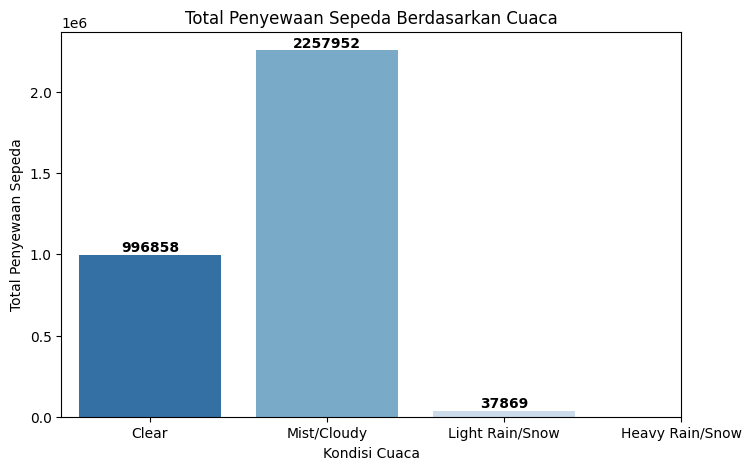

In [22]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_day, 
    x="weathersit", 
    y="cnt", 
    estimator=sum, 
    errorbar=None,
    hue="weathersit",
    palette="Blues_r",
    legend=False
)

# Menambahkan judul dan label
plt.title("Total Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda")

# Mengatur label sumbu X agar lebih informatif
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])

# Menambahkan anotasi di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Menampilkan plot
plt.show()


### Apakah terdapat pola musiman atau tren waktu dalam penggunaan sepeda selama tahun 2011 dan 2012?

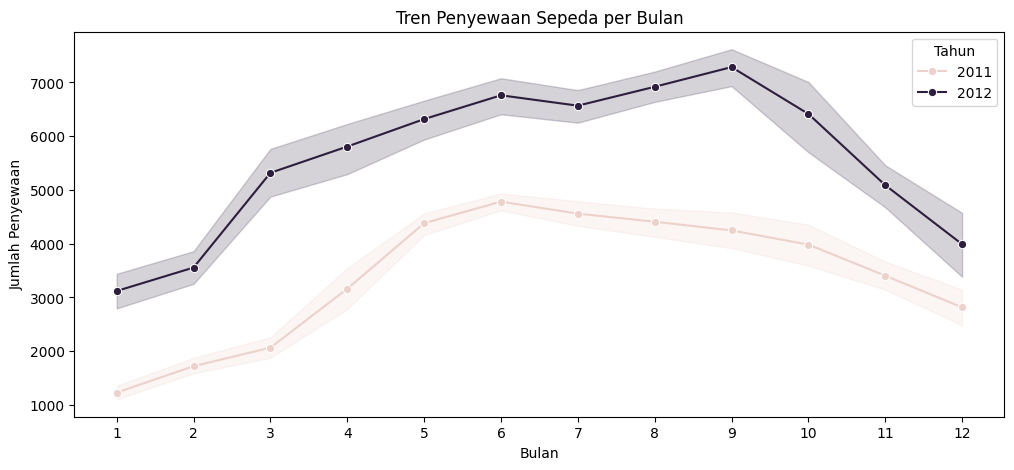

In [19]:
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_day, x='month', y='cnt', hue='year', marker="o")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(1, 13))
plt.legend(title="Tahun")
plt.show()

**Insight:**
- Kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda. Saat cuaca cerah atau berawan, penyewaan tetap tinggi, tetapi saat hujan atau salju ringan terjadi, penyewaan turun drastis. Kondisi cuaca ekstrem (hujan/salju deras) bahkan bisa membuat penyewaan nol.
- Penggunaan sepeda memiliki pola musiman yang jelas, dengan tren meningkat di musim panas dan menurun di musim dingin. Selain itu, jumlah penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan 2011, menunjukkan pertumbuhan dalam penggunaan sepeda dari tahun ke tahun.

## Analisis Hubungan antar korelasi

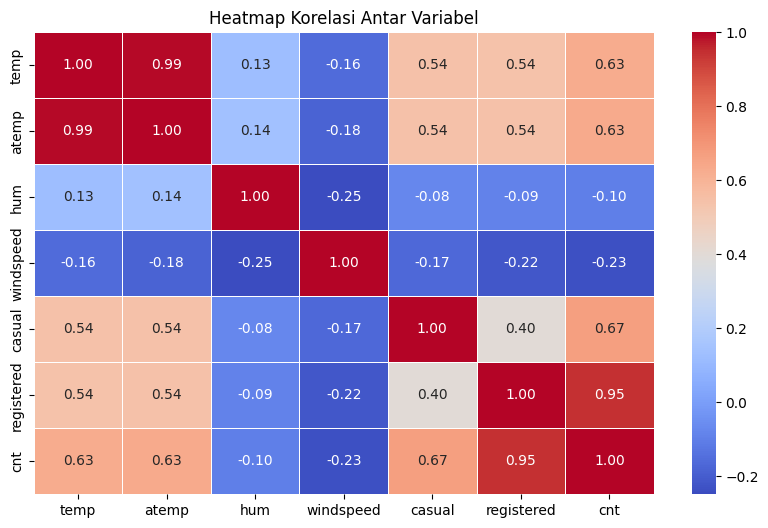

In [20]:
# Pilih hanya variabel numerik yang relevan untuk korelasi
correlation_features = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
correlation_matrix = df_day[correlation_features].corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Insight:**
- Faktor suhu udara dan pengguna terdaftar adalah indikator utama dalam memprediksi jumlah penyewaan sepeda.
- Kondisi cuaca ekstrem seperti kelembaban tinggi dan angin kencang bisa sedikit menurunkan jumlah penyewaan.
- Untuk meningkatkan jumlah penyewaan sepeda, strategi bisa difokuskan pada pengguna terdaftar dan memberikan insentif pada hari-hari dengan kondisi cuaca yang menguntungkan.

## Conclusion

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda selama tahun 2011 dan 2012?
Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda.
- Cuaca cerah (Clear) dan berawan ringan (Mist/Cloudy) memiliki jumlah penyewaan tertinggi.
- Sebagian besar pengguna lebih nyaman bersepeda saat cuaca mendukung.
- Median jumlah penyewaan cukup tinggi dalam kondisi ini, dengan distribusi data yang lebih luas.
- Penyewaan turun drastis saat hujan ringan atau salju (Light Rain/Snow).
- Hujan dan salju mengurangi kenyamanan bersepeda, menyebabkan penurunan signifikan.
- Tidak ada atau hampir tidak ada penyewaan saat hujan atau salju lebat (Heavy Rain/Snow).
- Kondisi cuaca ekstrem menjadi penghalang utama bagi pengguna sepeda.
- Kesimpulan:
Semakin buruk kondisi cuaca, semakin rendah jumlah penyewaan sepeda. Oleh karena itu, operator sepeda dapat mempertimbangkan strategi seperti diskon atau insentif saat cuaca kurang ideal untuk menjaga tingkat penyewaan.
2. Apakah terdapat pola musiman atau tren waktu dalam penggunaan sepeda selama tahun 2011 dan 2012?
- Terdapat pola musiman yang jelas dalam penggunaan sepeda selama tahun 2011 dan 2012.
- Tren kenaikan jumlah penyewaan terjadi pada musim semi hingga musim panas (Maret - September).
- Puncak penggunaan sepeda terjadi sekitar bulan Juni - September, menunjukkan bahwa orang lebih banyak bersepeda saat cuaca lebih hangat.
Kenaikan ini konsisten di kedua tahun, dengan jumlah penyewaan lebih tinggi di tahun 2012 dibandingkan 2011.
- Tren penurunan terlihat pada musim gugur hingga musim dingin (Oktober - Februari).
- Jumlah penyewaan mulai menurun setelah September dan mencapai titik terendah pada bulan Desember - Januari.
Ini menunjukkan bahwa suhu dingin dan kemungkinan cuaca buruk berkontribusi terhadap berkurangnya minat menggunakan sepeda.
- Tahun 2012 menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan 2011 sepanjang tahun.
- Ini dapat menunjukkan peningkatan popularitas layanan penyewaan sepeda atau perbaikan infrastruktur yang mendukung penggunaan sepeda lebih luas.
- Kesimpulan:
Penggunaan sepeda menunjukkan pola musiman yang kuat, dengan jumlah penyewaan meningkat pada bulan-bulan hangat dan menurun saat musim dingin. Untuk meningkatkan penggunaan sepanjang tahun, operator dapat mempertimbangkan strategi seperti menyediakan perlengkapan musim dingin, promosi di bulan-bulan dingin, atau memperkenalkan rute yang lebih terlindungi dari cuaca buruk.